In [1]:
import sys
sys.path.append('/Users/nagairyousuke/Documents/kashima_lab/master_paper')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('husl')

## 1. データの読み込み

In [2]:
# K=10 のデータを読み込み
data_dir_k10 = Path('../../outputs/assistments_2009_2010/dina_estimation/min150_k10')
first_k10 = pd.read_csv(data_dir_k10 / 'skill_states_first.csv', index_col=0)
second_k10 = pd.read_csv(data_dir_k10 / 'skill_states_second.csv', index_col=0)

print(f"K=10 データ:")
print(f"  学生数: {len(first_k10)}")
print(f"  スキル数: {len(first_k10.columns)}")
print(f"  前半データ形状: {first_k10.shape}")
print(f"  後半データ形状: {second_k10.shape}")

K=10 データ:
  学生数: 70
  スキル数: 10
  前半データ形状: (70, 10)
  後半データ形状: (70, 10)


In [3]:
# K=5 のデータを読み込み
data_dir_k5 = Path('../../outputs/assistments_2009_2010/dina_estimation/min150_k5')
first_k5 = pd.read_csv(data_dir_k5 / 'skill_states_first.csv', index_col=0)
second_k5 = pd.read_csv(data_dir_k5 / 'skill_states_second.csv', index_col=0)

# 論理和を適用（一度習得したスキルは喪失しない）
second_k10_or = np.maximum(first_k10.values, second_k10.values)
second_k5_or = np.maximum(first_k5.values, second_k5.values)

print(f"K=5 データ:")
print(f"  学生数: {len(first_k5)}")
print(f"  スキル数: {len(first_k5.columns)}")
print(f"  前半データ形状: {first_k5.shape}")
print(f"  後半データ形状: {second_k5.shape}")
print(f"  論理和適用後の形状: {second_k5_or.shape}")

K=5 データ:
  学生数: 109
  スキル数: 5
  前半データ形状: (109, 5)
  後半データ形状: (109, 5)
  論理和適用後の形状: (109, 5)


## 2. 習得スキル数の分布

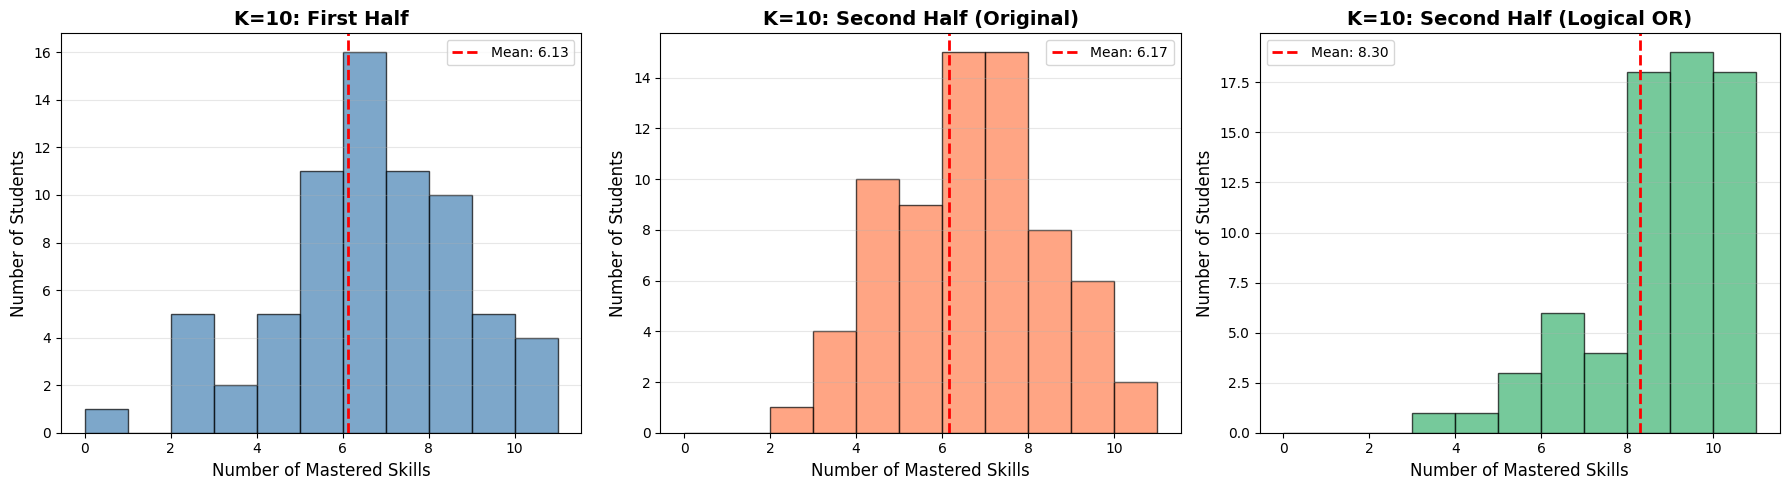


K=10 Statistics:
First Half - Mean: 6.13, Std: 2.17, Median: 6
Second Half (Original) - Mean: 6.17, Std: 1.83, Median: 6
Second Half (Logical OR) - Mean: 8.30, Std: 1.61, Median: 9


In [4]:
# K=10: 習得スキル数の計算
first_k10_mastered = first_k10.sum(axis=1)
second_k10_mastered = second_k10.sum(axis=1)
second_k10_or_mastered = second_k10_or.sum(axis=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 前半
axes[0].hist(first_k10_mastered, bins=range(0, 12), alpha=0.7, edgecolor='black', color='steelblue')
axes[0].axvline(first_k10_mastered.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {first_k10_mastered.mean():.2f}')
axes[0].set_xlabel('Number of Mastered Skills', fontsize=12)
axes[0].set_ylabel('Number of Students', fontsize=12)
axes[0].set_title('K=10: First Half', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 後半（元）
axes[1].hist(second_k10_mastered, bins=range(0, 12), alpha=0.7, edgecolor='black', color='coral')
axes[1].axvline(second_k10_mastered.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {second_k10_mastered.mean():.2f}')
axes[1].set_xlabel('Number of Mastered Skills', fontsize=12)
axes[1].set_ylabel('Number of Students', fontsize=12)
axes[1].set_title('K=10: Second Half (Original)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 後半（論理和）
axes[2].hist(second_k10_or_mastered, bins=range(0, 12), alpha=0.7, edgecolor='black', color='mediumseagreen')
axes[2].axvline(second_k10_or_mastered.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {second_k10_or_mastered.mean():.2f}')
axes[2].set_xlabel('Number of Mastered Skills', fontsize=12)
axes[2].set_ylabel('Number of Students', fontsize=12)
axes[2].set_title('K=10: Second Half (Logical OR)', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nK=10 Statistics:")
print(f"First Half - Mean: {first_k10_mastered.mean():.2f}, Std: {first_k10_mastered.std():.2f}, Median: {first_k10_mastered.median():.0f}")
print(f"Second Half (Original) - Mean: {second_k10_mastered.mean():.2f}, Std: {second_k10_mastered.std():.2f}, Median: {second_k10_mastered.median():.0f}")
print(f"Second Half (Logical OR) - Mean: {second_k10_or_mastered.mean():.2f}, Std: {second_k10_or_mastered.std():.2f}, Median: {np.median(second_k10_or_mastered):.0f}")

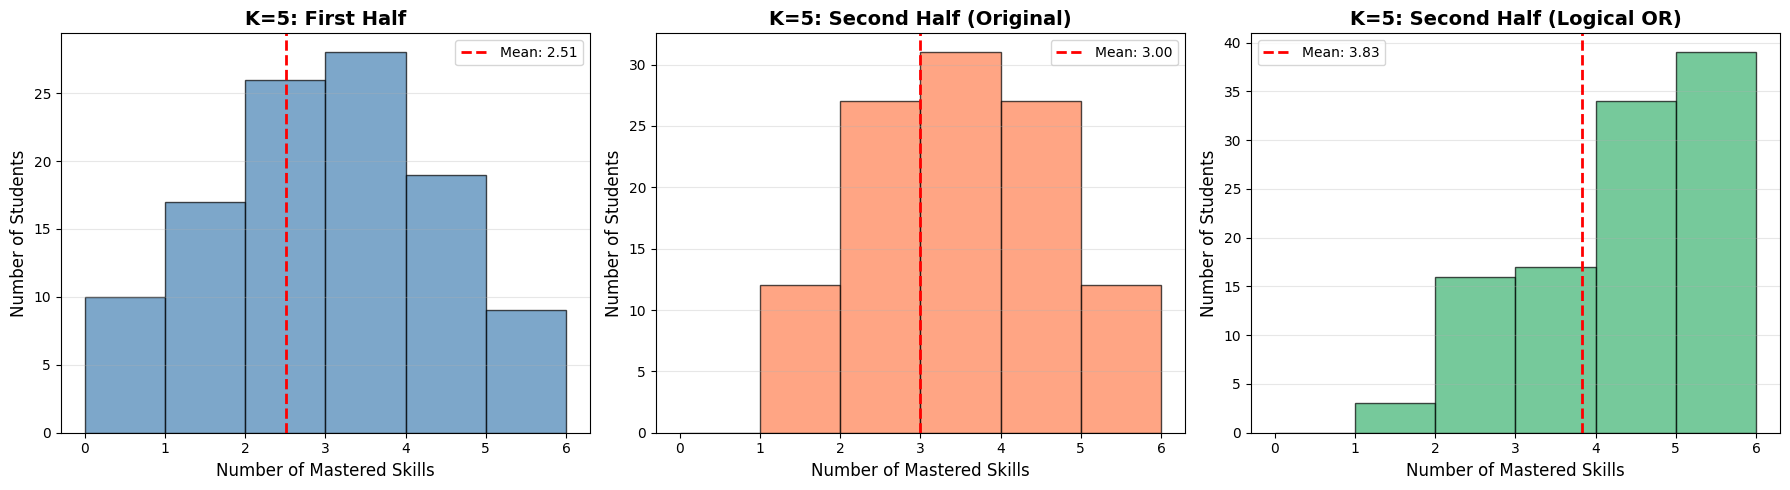


K=5 Statistics:
First Half - Mean: 2.51, Std: 1.41, Median: 3
Second Half (Original) - Mean: 3.00, Std: 1.18, Median: 3
Second Half (Logical OR) - Mean: 3.83, Std: 1.15, Median: 4


In [5]:
# K=5: 習得スキル数の計算
first_k5_mastered = first_k5.sum(axis=1)
second_k5_mastered = second_k5.sum(axis=1)
second_k5_or_mastered = second_k5_or.sum(axis=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 前半
axes[0].hist(first_k5_mastered, bins=range(0, 7), alpha=0.7, edgecolor='black', color='steelblue')
axes[0].axvline(first_k5_mastered.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {first_k5_mastered.mean():.2f}')
axes[0].set_xlabel('Number of Mastered Skills', fontsize=12)
axes[0].set_ylabel('Number of Students', fontsize=12)
axes[0].set_title('K=5: First Half', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 後半（元）
axes[1].hist(second_k5_mastered, bins=range(0, 7), alpha=0.7, edgecolor='black', color='coral')
axes[1].axvline(second_k5_mastered.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {second_k5_mastered.mean():.2f}')
axes[1].set_xlabel('Number of Mastered Skills', fontsize=12)
axes[1].set_ylabel('Number of Students', fontsize=12)
axes[1].set_title('K=5: Second Half (Original)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 後半（論理和）
axes[2].hist(second_k5_or_mastered, bins=range(0, 7), alpha=0.7, edgecolor='black', color='mediumseagreen')
axes[2].axvline(second_k5_or_mastered.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {second_k5_or_mastered.mean():.2f}')
axes[2].set_xlabel('Number of Mastered Skills', fontsize=12)
axes[2].set_ylabel('Number of Students', fontsize=12)
axes[2].set_title('K=5: Second Half (Logical OR)', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nK=5 Statistics:")
print(f"First Half - Mean: {first_k5_mastered.mean():.2f}, Std: {first_k5_mastered.std():.2f}, Median: {first_k5_mastered.median():.0f}")
print(f"Second Half (Original) - Mean: {second_k5_mastered.mean():.2f}, Std: {second_k5_mastered.std():.2f}, Median: {second_k5_mastered.median():.0f}")
print(f"Second Half (Logical OR) - Mean: {second_k5_or_mastered.mean():.2f}, Std: {second_k5_or_mastered.std():.2f}, Median: {np.median(second_k5_or_mastered):.0f}")

## 3. スキル習得の変化（純増）の分布

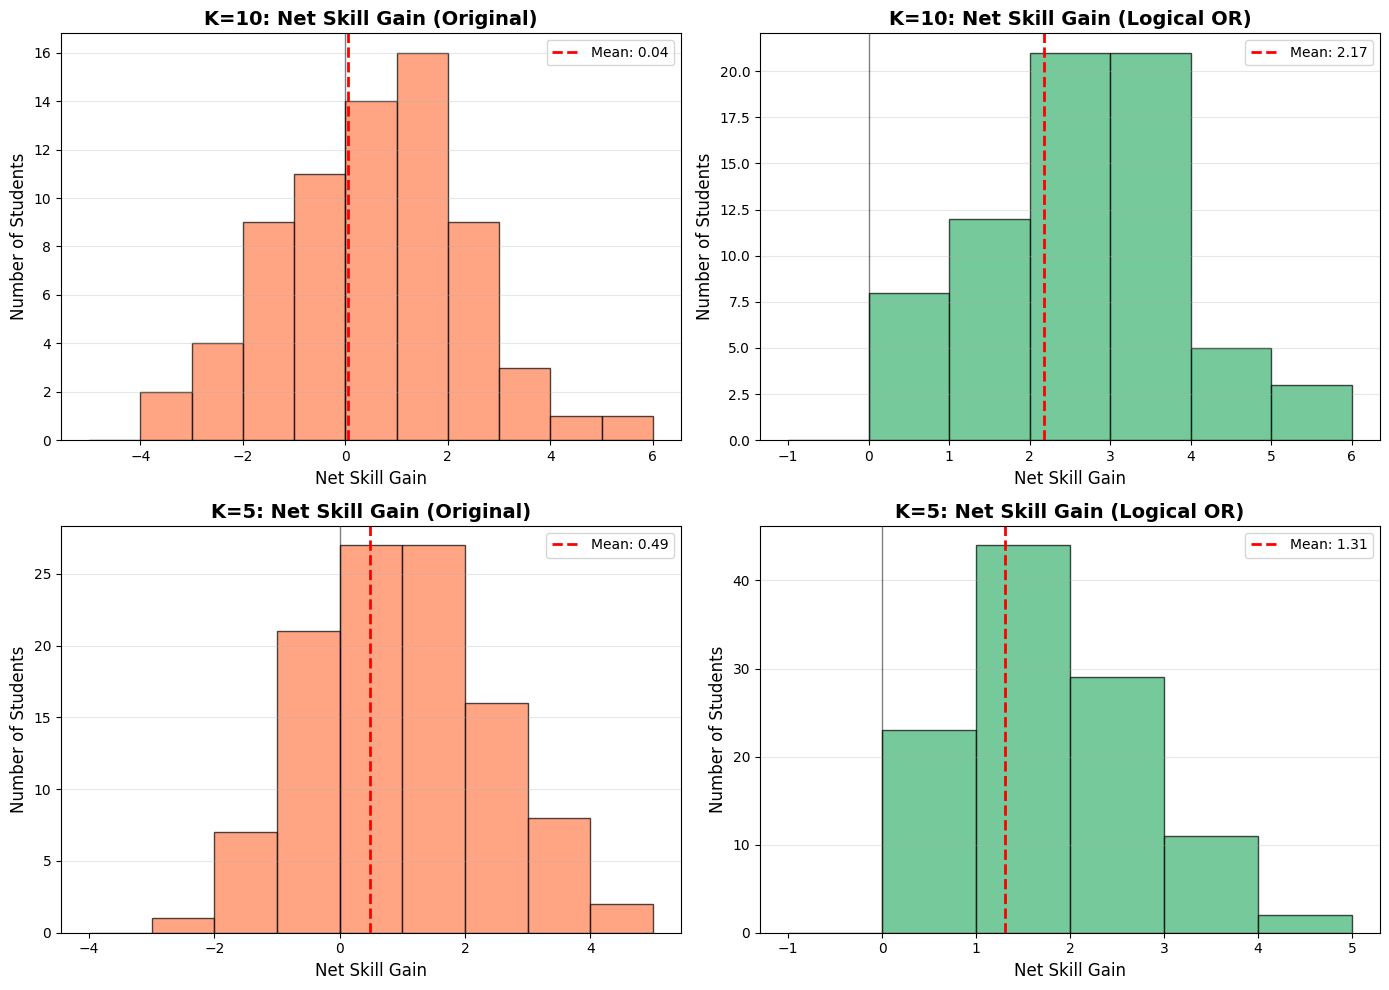


Net Skill Gain Statistics:

K=10 (Original) - Mean: 0.04, Std: 1.84
  Increased: 30, Decreased: 26, No Change: 14

K=10 (Logical OR) - Mean: 2.17, Std: 1.26
  Increased: 62, Decreased: 0, No Change: 8

K=5 (Original) - Mean: 0.49, Std: 1.45
  Increased: 53, Decreased: 29, No Change: 27

K=5 (Logical OR) - Mean: 1.31, Std: 0.98
  Increased: 86, Decreased: 0, No Change: 23


In [6]:
# 純増の計算
net_gain_k10 = second_k10_mastered - first_k10_mastered
net_gain_k10_or = second_k10_or_mastered - first_k10_mastered
net_gain_k5 = second_k5_mastered - first_k5_mastered
net_gain_k5_or = second_k5_or_mastered - first_k5_mastered

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# K=10 元
axes[0, 0].hist(net_gain_k10, bins=range(int(net_gain_k10.min())-1, int(net_gain_k10.max())+2), 
             alpha=0.7, edgecolor='black', color='coral')
axes[0, 0].axvline(net_gain_k10.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {net_gain_k10.mean():.2f}')
axes[0, 0].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[0, 0].set_xlabel('Net Skill Gain', fontsize=12)
axes[0, 0].set_ylabel('Number of Students', fontsize=12)
axes[0, 0].set_title('K=10: Net Skill Gain (Original)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# K=10 論理和
axes[0, 1].hist(net_gain_k10_or, bins=range(int(net_gain_k10_or.min())-1, int(net_gain_k10_or.max())+2), 
             alpha=0.7, edgecolor='black', color='mediumseagreen')
axes[0, 1].axvline(net_gain_k10_or.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {net_gain_k10_or.mean():.2f}')
axes[0, 1].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[0, 1].set_xlabel('Net Skill Gain', fontsize=12)
axes[0, 1].set_ylabel('Number of Students', fontsize=12)
axes[0, 1].set_title('K=10: Net Skill Gain (Logical OR)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# K=5 元
axes[1, 0].hist(net_gain_k5, bins=range(int(net_gain_k5.min())-1, int(net_gain_k5.max())+2), 
             alpha=0.7, edgecolor='black', color='coral')
axes[1, 0].axvline(net_gain_k5.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {net_gain_k5.mean():.2f}')
axes[1, 0].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[1, 0].set_xlabel('Net Skill Gain', fontsize=12)
axes[1, 0].set_ylabel('Number of Students', fontsize=12)
axes[1, 0].set_title('K=5: Net Skill Gain (Original)', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# K=5 論理和
axes[1, 1].hist(net_gain_k5_or, bins=range(int(net_gain_k5_or.min())-1, int(net_gain_k5_or.max())+2), 
             alpha=0.7, edgecolor='black', color='mediumseagreen')
axes[1, 1].axvline(net_gain_k5_or.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {net_gain_k5_or.mean():.2f}')
axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[1, 1].set_xlabel('Net Skill Gain', fontsize=12)
axes[1, 1].set_ylabel('Number of Students', fontsize=12)
axes[1, 1].set_title('K=5: Net Skill Gain (Logical OR)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nNet Skill Gain Statistics:")
print(f"\nK=10 (Original) - Mean: {net_gain_k10.mean():.2f}, Std: {net_gain_k10.std():.2f}")
print(f"  Increased: {(net_gain_k10 > 0).sum()}, Decreased: {(net_gain_k10 < 0).sum()}, No Change: {(net_gain_k10 == 0).sum()}")
print(f"\nK=10 (Logical OR) - Mean: {net_gain_k10_or.mean():.2f}, Std: {net_gain_k10_or.std():.2f}")
print(f"  Increased: {(net_gain_k10_or > 0).sum()}, Decreased: {(net_gain_k10_or < 0).sum()}, No Change: {(net_gain_k10_or == 0).sum()}")

print(f"\nK=5 (Original) - Mean: {net_gain_k5.mean():.2f}, Std: {net_gain_k5.std():.2f}")
print(f"  Increased: {(net_gain_k5 > 0).sum()}, Decreased: {(net_gain_k5 < 0).sum()}, No Change: {(net_gain_k5 == 0).sum()}")
print(f"\nK=5 (Logical OR) - Mean: {net_gain_k5_or.mean():.2f}, Std: {net_gain_k5_or.std():.2f}")
print(f"  Increased: {(net_gain_k5_or > 0).sum()}, Decreased: {(net_gain_k5_or < 0).sum()}, No Change: {(net_gain_k5_or == 0).sum()}")

## 4. スキルごとの習得率

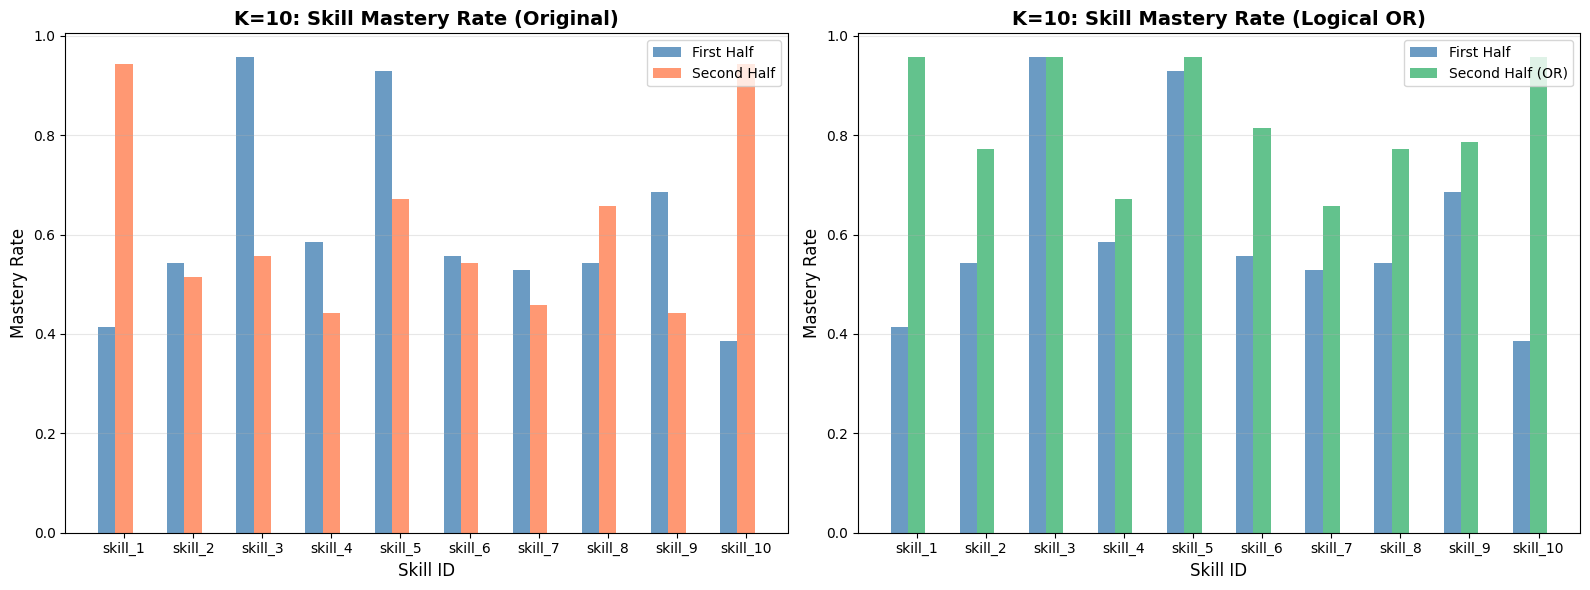


K=10 Skill Mastery Rate Change:
Original:
  skill_1: +52.86%
  skill_2: -2.86%
  skill_3: -40.00%
  skill_4: -14.29%
  skill_5: -25.71%
  skill_6: -1.43%
  skill_7: -7.14%
  skill_8: +11.43%
  skill_9: -24.29%
  skill_10: +55.71%

Logical OR:
  skill_1: +54.29%
  skill_2: +22.86%
  skill_3: +0.00%
  skill_4: +8.57%
  skill_5: +2.86%
  skill_6: +25.71%
  skill_7: +12.86%
  skill_8: +22.86%
  skill_9: +10.00%
  skill_10: +57.14%


In [7]:
# K=10: スキルごとの習得率
skill_mastery_first_k10 = first_k10.mean(axis=0)
skill_mastery_second_k10 = second_k10.mean(axis=0)
skill_mastery_second_k10_or = pd.Series(second_k10_or.mean(axis=0), index=first_k10.columns)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
x = np.arange(len(skill_mastery_first_k10))
width = 0.25

# Original
axes[0].bar(x - width, skill_mastery_first_k10, width, label='First Half', alpha=0.8, color='steelblue')
axes[0].bar(x, skill_mastery_second_k10, width, label='Second Half', alpha=0.8, color='coral')
axes[0].set_xlabel('Skill ID', fontsize=12)
axes[0].set_ylabel('Mastery Rate', fontsize=12)
axes[0].set_title('K=10: Skill Mastery Rate (Original)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(skill_mastery_first_k10.index)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Logical OR
axes[1].bar(x - width, skill_mastery_first_k10, width, label='First Half', alpha=0.8, color='steelblue')
axes[1].bar(x, skill_mastery_second_k10_or, width, label='Second Half (OR)', alpha=0.8, color='mediumseagreen')
axes[1].set_xlabel('Skill ID', fontsize=12)
axes[1].set_ylabel('Mastery Rate', fontsize=12)
axes[1].set_title('K=10: Skill Mastery Rate (Logical OR)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(skill_mastery_first_k10.index)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 習得率の変化
skill_change_k10 = skill_mastery_second_k10 - skill_mastery_first_k10
skill_change_k10_or = skill_mastery_second_k10_or - skill_mastery_first_k10
print(f"\nK=10 Skill Mastery Rate Change:")
print("Original:")
for skill_id, change in skill_change_k10.items():
    print(f"  {skill_id}: {change:+.2%}")
print("\nLogical OR:")
for skill_id, change in skill_change_k10_or.items():
    print(f"  {skill_id}: {change:+.2%}")

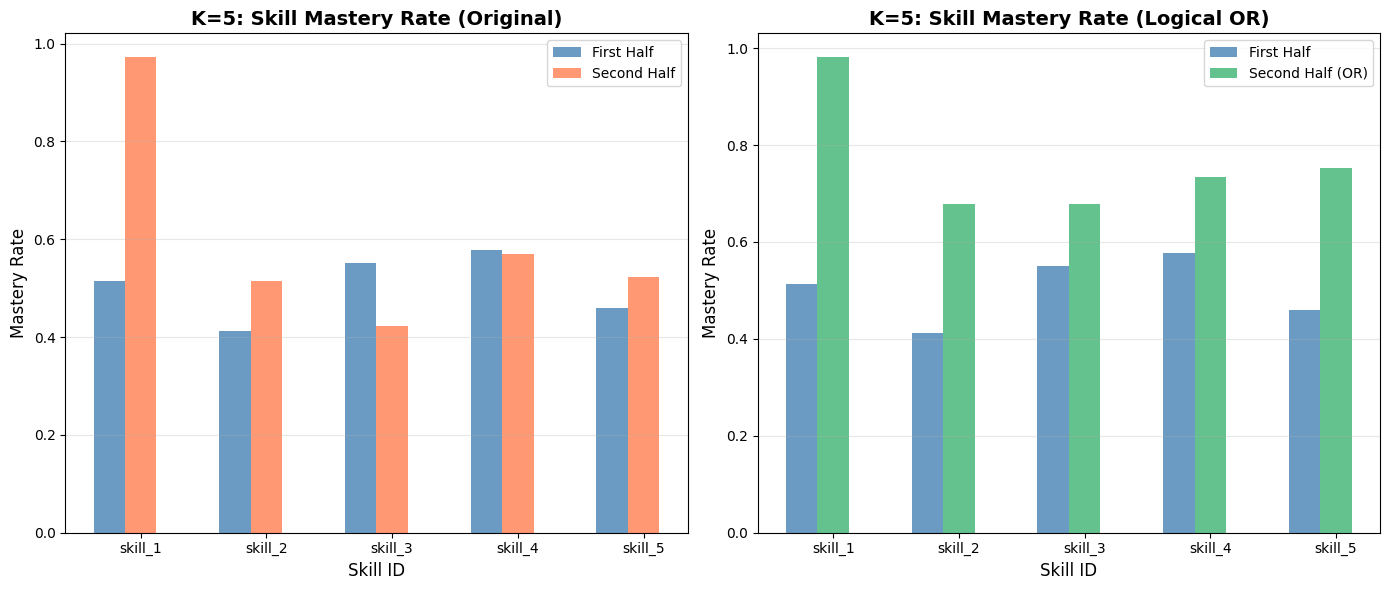


K=5 Skill Mastery Rate Change:
Original:
  skill_1: +45.87%
  skill_2: +10.09%
  skill_3: -12.84%
  skill_4: -0.92%
  skill_5: +6.42%

Logical OR:
  skill_1: +46.79%
  skill_2: +26.61%
  skill_3: +12.84%
  skill_4: +15.60%
  skill_5: +29.36%


In [8]:
# K=5: スキルごとの習得率
skill_mastery_first_k5 = first_k5.mean(axis=0)
skill_mastery_second_k5 = second_k5.mean(axis=0)
skill_mastery_second_k5_or = pd.Series(second_k5_or.mean(axis=0), index=first_k5.columns)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
x = np.arange(len(skill_mastery_first_k5))
width = 0.25

# Original
axes[0].bar(x - width, skill_mastery_first_k5, width, label='First Half', alpha=0.8, color='steelblue')
axes[0].bar(x, skill_mastery_second_k5, width, label='Second Half', alpha=0.8, color='coral')
axes[0].set_xlabel('Skill ID', fontsize=12)
axes[0].set_ylabel('Mastery Rate', fontsize=12)
axes[0].set_title('K=5: Skill Mastery Rate (Original)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(skill_mastery_first_k5.index)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Logical OR
axes[1].bar(x - width, skill_mastery_first_k5, width, label='First Half', alpha=0.8, color='steelblue')
axes[1].bar(x, skill_mastery_second_k5_or, width, label='Second Half (OR)', alpha=0.8, color='mediumseagreen')
axes[1].set_xlabel('Skill ID', fontsize=12)
axes[1].set_ylabel('Mastery Rate', fontsize=12)
axes[1].set_title('K=5: Skill Mastery Rate (Logical OR)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(skill_mastery_first_k5.index)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 習得率の変化
skill_change_k5 = skill_mastery_second_k5 - skill_mastery_first_k5
skill_change_k5_or = skill_mastery_second_k5_or - skill_mastery_first_k5
print(f"\nK=5 Skill Mastery Rate Change:")
print("Original:")
for skill_id, change in skill_change_k5.items():
    print(f"  {skill_id}: {change:+.2%}")
print("\nLogical OR:")
for skill_id, change in skill_change_k5_or.items():
    print(f"  {skill_id}: {change:+.2%}")

## 5. スキル状態の遷移パターン

In [9]:
def analyze_skill_transitions(first_states, second_states, title):
    """
    スキル状態の遷移パターンを分析
    """
    n_students, n_skills = first_states.shape
    total = n_students * n_skills
    
    # 遷移パターンのカウント
    acquired = ((first_states == 0) & (second_states == 1)).sum()  # 0 -> 1
    lost = ((first_states == 1) & (second_states == 0)).sum()      # 1 -> 0
    maintained = ((first_states == 1) & (second_states == 1)).sum()  # 1 -> 1
    unlearned = ((first_states == 0) & (second_states == 0)).sum()  # 0 -> 0
    
    # 可視化
    labels = ['Acquired\n(0->1)', 'Lost\n(1->0)', 'Maintained\n(1->1)', 'Unlearned\n(0->0)']
    counts = [acquired, lost, maintained, unlearned]
    percentages = [c/total*100 for c in counts]
    colors = ['#2ecc71', '#e74c3c', '#3498db', '#95a5a6']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 棒グラフ
    axes[0].bar(labels, counts, color=colors, alpha=0.8, edgecolor='black')
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_title(f'{title}: Skill State Transitions', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # 値をバーの上に表示
    for i, (count, pct) in enumerate(zip(counts, percentages)):
        axes[0].text(i, count, f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10)
    
    # 円グラフ
    axes[1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
                textprops={'fontsize': 11})
    axes[1].set_title(f'{title}: Transition Pattern Ratio', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 統計情報を出力
    print(f"\n{title} Skill State Transitions:")
    print(f"  Total: {total}")
    print(f"  Acquired (0->1): {acquired} ({acquired/total*100:.2f}%)")
    print(f"  Lost (1->0): {lost} ({lost/total*100:.2f}%)")
    print(f"  Maintained (1->1): {maintained} ({maintained/total*100:.2f}%)")
    print(f"  Unlearned (0->0): {unlearned} ({unlearned/total*100:.2f}%)")
    
    return acquired, lost, maintained, unlearned

K=10: Original DINA Estimation


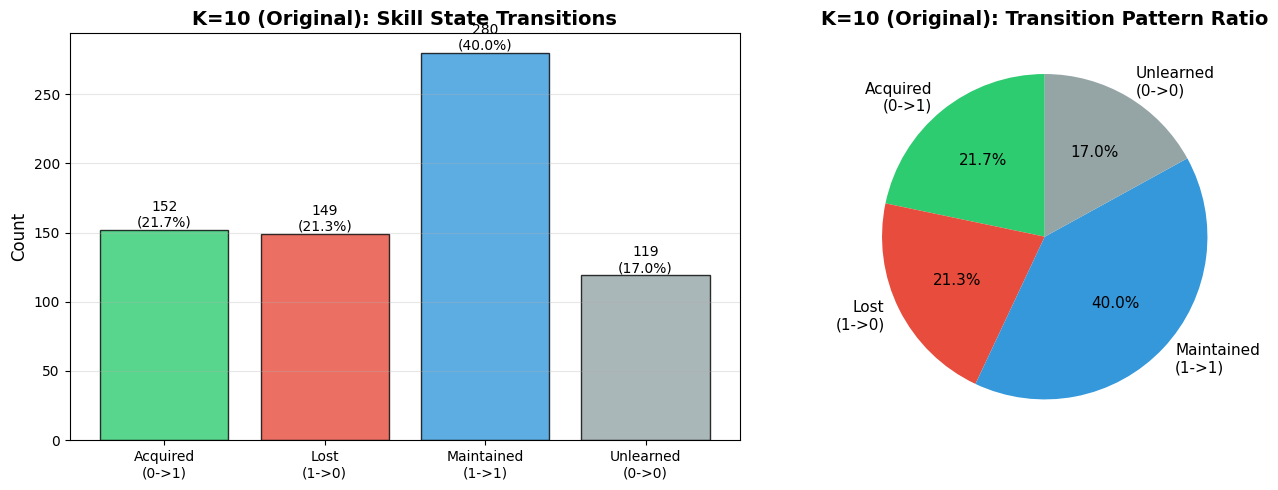


K=10 (Original) Skill State Transitions:
  Total: 700
  Acquired (0->1): 152 (21.71%)
  Lost (1->0): 149 (21.29%)
  Maintained (1->1): 280 (40.00%)
  Unlearned (0->0): 119 (17.00%)

K=10: After Logical OR


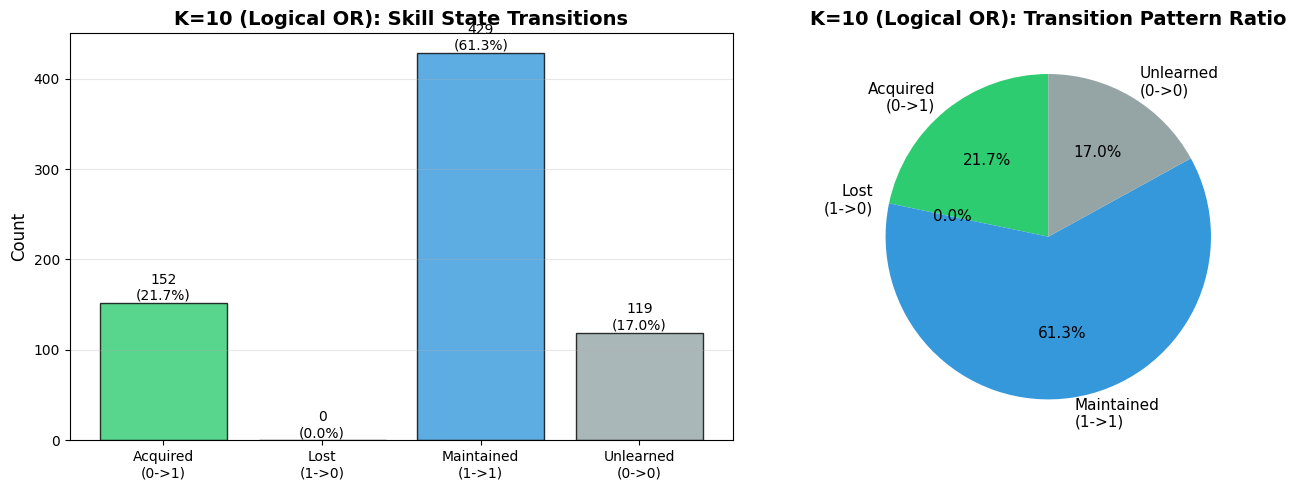


K=10 (Logical OR) Skill State Transitions:
  Total: 700
  Acquired (0->1): 152 (21.71%)
  Lost (1->0): 0 (0.00%)
  Maintained (1->1): 429 (61.29%)
  Unlearned (0->0): 119 (17.00%)


(np.int64(152), np.int64(0), np.int64(429), np.int64(119))

In [10]:
# K=10 の遷移分析（元のデータ）
print("="*70)
print("K=10: Original DINA Estimation")
print("="*70)
analyze_skill_transitions(first_k10.values, second_k10.values, 'K=10 (Original)')

print("\n" + "="*70)
print("K=10: After Logical OR")
print("="*70)
analyze_skill_transitions(first_k10.values, second_k10_or, 'K=10 (Logical OR)')

K=5: Original DINA Estimation


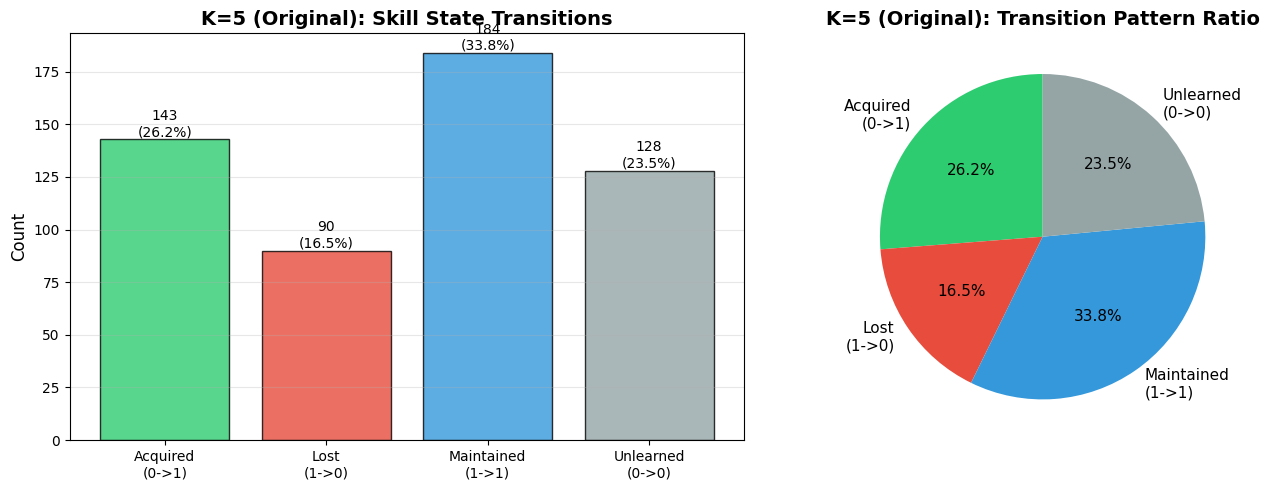


K=5 (Original) Skill State Transitions:
  Total: 545
  Acquired (0->1): 143 (26.24%)
  Lost (1->0): 90 (16.51%)
  Maintained (1->1): 184 (33.76%)
  Unlearned (0->0): 128 (23.49%)

K=5: After Logical OR


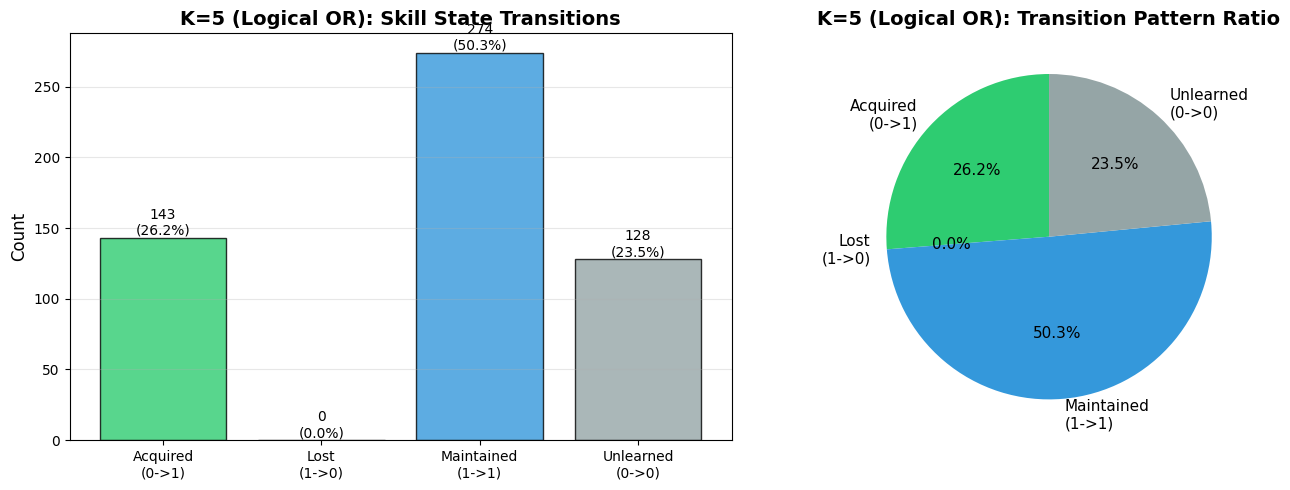


K=5 (Logical OR) Skill State Transitions:
  Total: 545
  Acquired (0->1): 143 (26.24%)
  Lost (1->0): 0 (0.00%)
  Maintained (1->1): 274 (50.28%)
  Unlearned (0->0): 128 (23.49%)


(np.int64(143), np.int64(0), np.int64(274), np.int64(128))

In [11]:
# K=5 の遷移分析（元のデータ）
print("="*70)
print("K=5: Original DINA Estimation")
print("="*70)
analyze_skill_transitions(first_k5.values, second_k5.values, 'K=5 (Original)')

print("\n" + "="*70)
print("K=5: After Logical OR")
print("="*70)
analyze_skill_transitions(first_k5.values, second_k5_or, 'K=5 (Logical OR)')

## 6. 前半と後半の相関分析

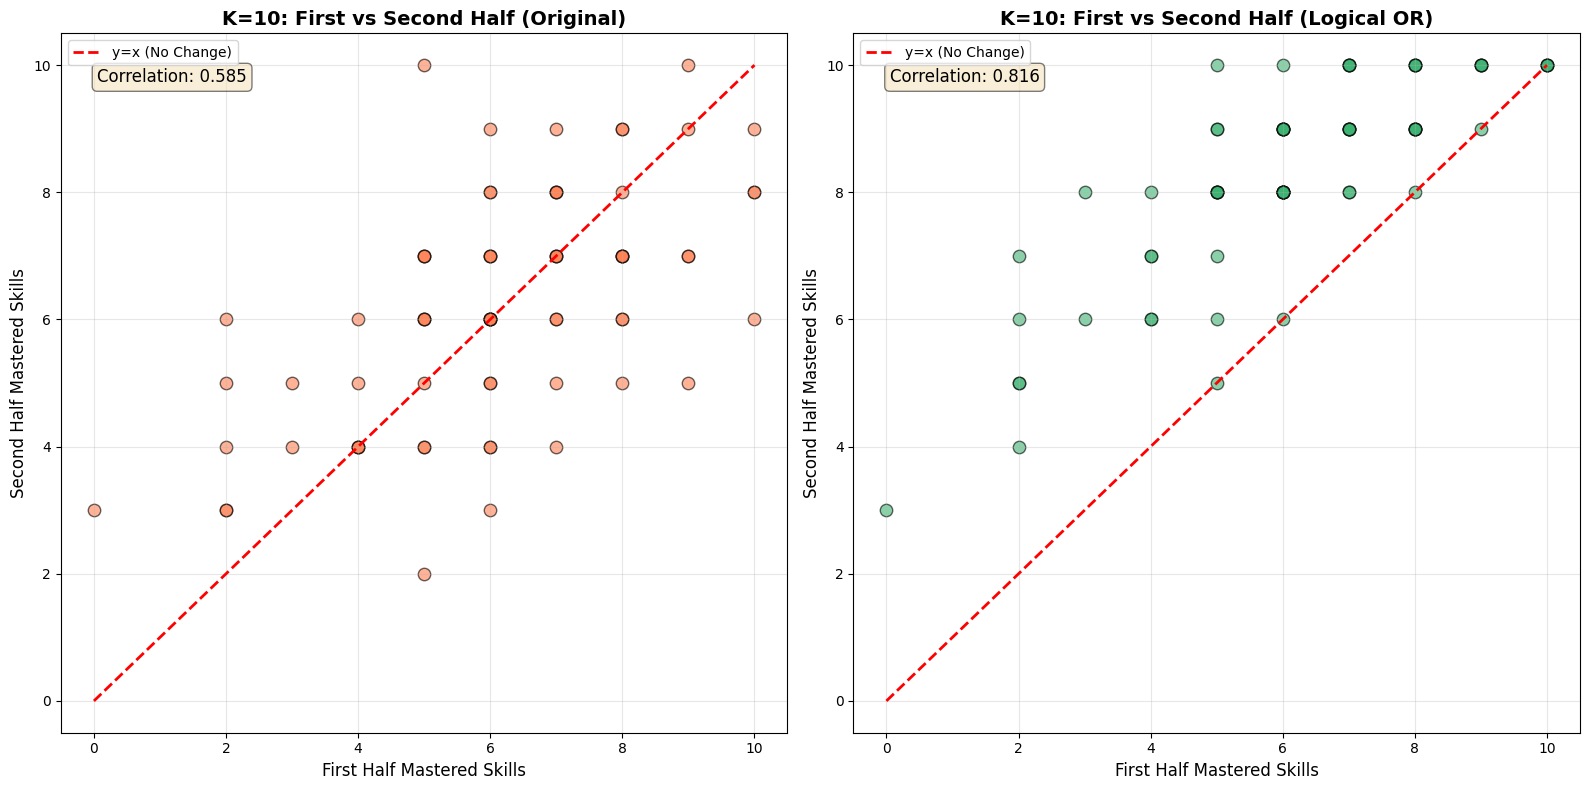

In [12]:
# K=10: 散布図
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original
axes[0].scatter(first_k10_mastered, second_k10_mastered, alpha=0.6, s=80, color='coral', edgecolor='black')
axes[0].plot([0, 10], [0, 10], 'r--', linewidth=2, label='y=x (No Change)')
axes[0].set_xlabel('First Half Mastered Skills', fontsize=12)
axes[0].set_ylabel('Second Half Mastered Skills', fontsize=12)
axes[0].set_title('K=10: First vs Second Half (Original)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_xlim(-0.5, 10.5)
axes[0].set_ylim(-0.5, 10.5)

corr_k10 = np.corrcoef(first_k10_mastered, second_k10_mastered)[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {corr_k10:.3f}', transform=axes[0].transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Logical OR
axes[1].scatter(first_k10_mastered, second_k10_or_mastered, alpha=0.6, s=80, color='mediumseagreen', edgecolor='black')
axes[1].plot([0, 10], [0, 10], 'r--', linewidth=2, label='y=x (No Change)')
axes[1].set_xlabel('First Half Mastered Skills', fontsize=12)
axes[1].set_ylabel('Second Half Mastered Skills', fontsize=12)
axes[1].set_title('K=10: First vs Second Half (Logical OR)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xlim(-0.5, 10.5)
axes[1].set_ylim(-0.5, 10.5)

corr_k10_or = np.corrcoef(first_k10_mastered, second_k10_or_mastered)[0, 1]
axes[1].text(0.05, 0.95, f'Correlation: {corr_k10_or:.3f}', transform=axes[1].transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

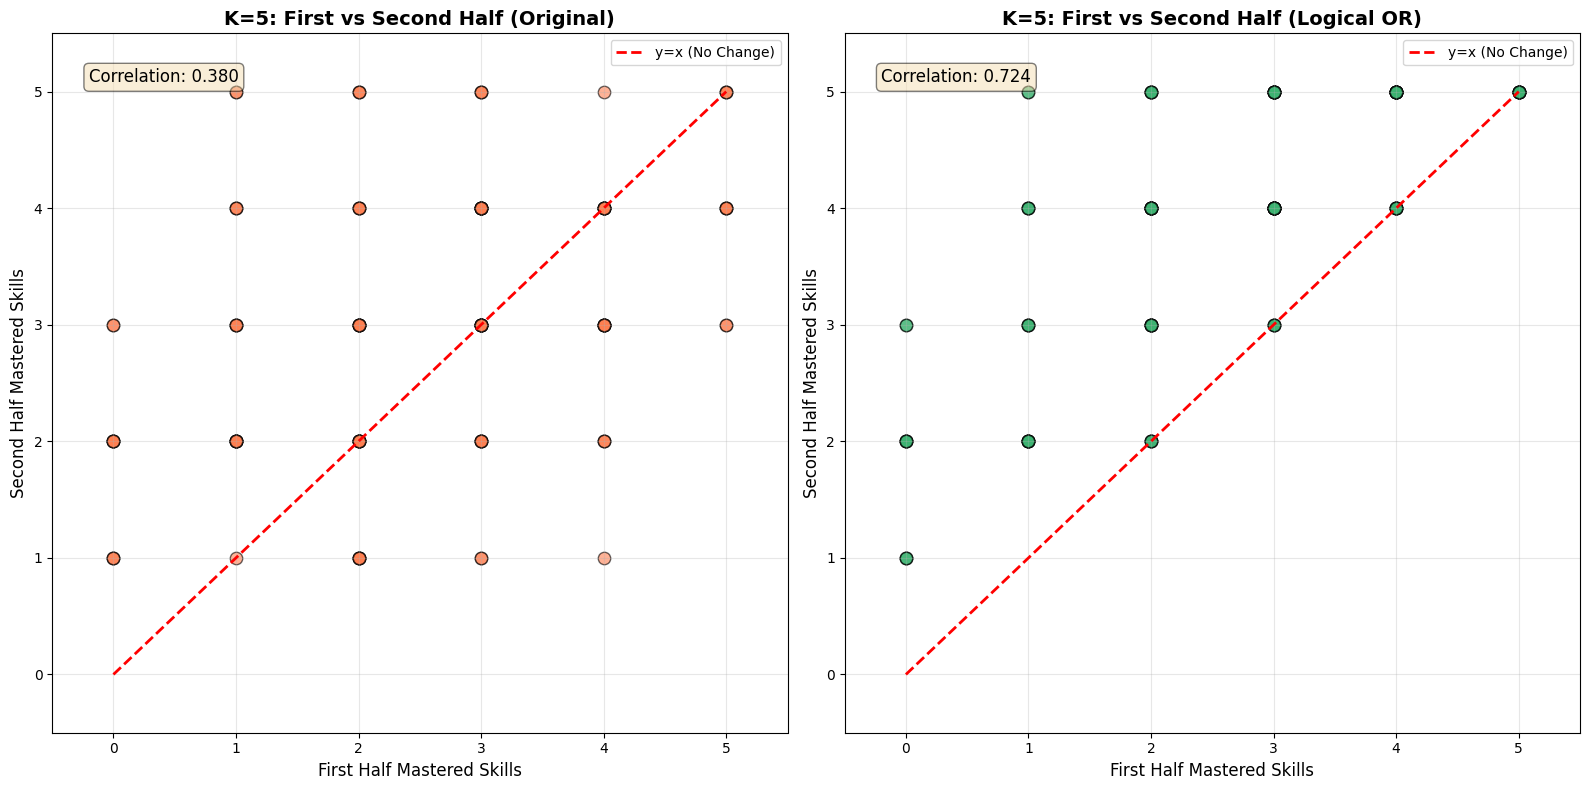

In [13]:
# K=5: 散布図
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Original
axes[0].scatter(first_k5_mastered, second_k5_mastered, alpha=0.6, s=80, color='coral', edgecolor='black')
axes[0].plot([0, 5], [0, 5], 'r--', linewidth=2, label='y=x (No Change)')
axes[0].set_xlabel('First Half Mastered Skills', fontsize=12)
axes[0].set_ylabel('Second Half Mastered Skills', fontsize=12)
axes[0].set_title('K=5: First vs Second Half (Original)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_xlim(-0.5, 5.5)
axes[0].set_ylim(-0.5, 5.5)

corr_k5 = np.corrcoef(first_k5_mastered, second_k5_mastered)[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {corr_k5:.3f}', transform=axes[0].transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Logical OR
axes[1].scatter(first_k5_mastered, second_k5_or_mastered, alpha=0.6, s=80, color='mediumseagreen', edgecolor='black')
axes[1].plot([0, 5], [0, 5], 'r--', linewidth=2, label='y=x (No Change)')
axes[1].set_xlabel('First Half Mastered Skills', fontsize=12)
axes[1].set_ylabel('Second Half Mastered Skills', fontsize=12)
axes[1].set_title('K=5: First vs Second Half (Logical OR)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xlim(-0.5, 5.5)
axes[1].set_ylim(-0.5, 5.5)

corr_k5_or = np.corrcoef(first_k5_mastered, second_k5_or_mastered)[0, 1]
axes[1].text(0.05, 0.95, f'Correlation: {corr_k5_or:.3f}', transform=axes[1].transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 7. まとめ

In [14]:
print("="*70)
print("Summary of Skill State Analysis")
print("="*70)

print("\n[K=10]")
print(f"  Number of Students: {len(first_k10)}")
print(f"  First Half Avg Mastered: {first_k10_mastered.mean():.2f} / 10")
print(f"  Second Half Avg Mastered (Original): {second_k10_mastered.mean():.2f} / 10")
print(f"  Second Half Avg Mastered (Logical OR): {second_k10_or_mastered.mean():.2f} / 10")
print(f"  Net Gain (Original): {net_gain_k10.mean():.2f}")
print(f"  Net Gain (Logical OR): {net_gain_k10_or.mean():.2f}")
print(f"  Correlation (Original): {corr_k10:.3f}")
print(f"  Correlation (Logical OR): {corr_k10_or:.3f}")
print(f"  Students with Skill Loss (Original): {(net_gain_k10 < 0).sum()}")
print(f"  Students with Skill Loss (Logical OR): {(net_gain_k10_or < 0).sum()}")

print("\n[K=5]")
print(f"  Number of Students: {len(first_k5)}")
print(f"  First Half Avg Mastered: {first_k5_mastered.mean():.2f} / 5")
print(f"  Second Half Avg Mastered (Original): {second_k5_mastered.mean():.2f} / 5")
print(f"  Second Half Avg Mastered (Logical OR): {second_k5_or_mastered.mean():.2f} / 5")
print(f"  Net Gain (Original): {net_gain_k5.mean():.2f}")
print(f"  Net Gain (Logical OR): {net_gain_k5_or.mean():.2f}")
print(f"  Correlation (Original): {corr_k5:.3f}")
print(f"  Correlation (Logical OR): {corr_k5_or:.3f}")
print(f"  Students with Skill Loss (Original): {(net_gain_k5 < 0).sum()}")
print(f"  Students with Skill Loss (Logical OR): {(net_gain_k5_or < 0).sum()}")

print("\n[Key Findings]")
print("  - Both K=10 and K=5 show positive net gain, but skill loss occurs in DINA estimation")
print("  - DINA model estimation uncertainty can cause skill state fluctuation")
print("  - Logical OR enforces the assumption: once mastered, skills are not forgotten")
print("  - After logical OR, skill loss is eliminated and net gain increases significantly")
print("="*70)

Summary of Skill State Analysis

[K=10]
  Number of Students: 70
  First Half Avg Mastered: 6.13 / 10
  Second Half Avg Mastered (Original): 6.17 / 10
  Second Half Avg Mastered (Logical OR): 8.30 / 10
  Net Gain (Original): 0.04
  Net Gain (Logical OR): 2.17
  Correlation (Original): 0.585
  Correlation (Logical OR): 0.816
  Students with Skill Loss (Original): 26
  Students with Skill Loss (Logical OR): 0

[K=5]
  Number of Students: 109
  First Half Avg Mastered: 2.51 / 5
  Second Half Avg Mastered (Original): 3.00 / 5
  Second Half Avg Mastered (Logical OR): 3.83 / 5
  Net Gain (Original): 0.49
  Net Gain (Logical OR): 1.31
  Correlation (Original): 0.380
  Correlation (Logical OR): 0.724
  Students with Skill Loss (Original): 29
  Students with Skill Loss (Logical OR): 0

[Key Findings]
  - Both K=10 and K=5 show positive net gain, but skill loss occurs in DINA estimation
  - DINA model estimation uncertainty can cause skill state fluctuation
  - Logical OR enforces the assumption